# Practicas 'Topicos de Astronomia moderna - 2024A'
_Mary Verdugo_

A continuacion se desarrollara el codigo y las preguntas correspondiente a las practicas propuestas por el profesor y discutidas en clases con los demas companeros. Se obviara la instalacion de los paquetes y tutorial (En mi caso, como usuario de MacOS fue necesario actualizar las librerias de anaconda y descargar la version de desarrollador de GALA, http://gala.adrian.pw/en/latest/) 

_Referencias:_
- https://doi.org/10.5281/zenodo.4159870
- https://doi.org/10.21105%2Fjoss.00388

### Practica I
Objetivo: Explorar el comportamiento de orbitas estelares en distintos potenciales galacticos
1. Que componentes principales debemos elegir para una galaxia tipo L* tardio?

Hacemos un __potencial compuesto__ usando la funcion de gala `gp.CCompositePotential.`
El potencial de dicha galaxia se puede dividir en:
 - Disk: Miyamoto-Nagai
 - Bulge: Hernquist
 - Dark Matter halo: Navarro Frenk and White (en primera instancia usaremos el esferico, no triaxial)

In [2]:
#We import the libraries and the differents tools of 
#pyhton to make figures and units from astropy: 
#python version 3.12.2
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd
from gala.units import galactic
import matplotlib.pyplot as plt

In [3]:
total_potential = gp.CCompositePotential()
total_potential['disk'] = gp.MiyamotoNagaiPotential(m = 1E11 , a=3, b=0.15, units=galactic)
total_potential['bulge'] = gp.HernquistPotential(m = 3E9 , c = 0.67, units=galactic)
total_potential['dm_halo'] = gp.NFWPotential.from_circular_velocity(v_c=200*u.km/u.s,
                                             r_s=10.*u.kpc,
                                             units=galactic)

Analogo al tutorial que es para una galaxia tipo MW, (https://gala.adrian.pw/en/latest/tutorials.html), lo completamos para el potencial de nuestra galaxia L* tardio (`total_potential`).

2. Calcular las curvas de velocidades para:   
    a. Cada componente  
    b. Sistema total
    


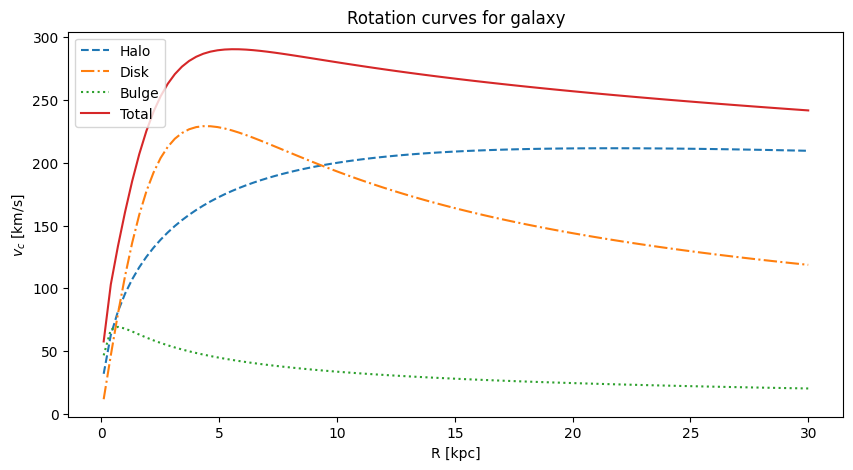

In [4]:
R_grid = np.linspace(0.1, 30, 100) * u.kpc
xyz = np.zeros((3,) + R_grid.shape) * total_potential['dm_halo'].units["length"]
xyz[0] = R_grid

vcirc_halo = total_potential['dm_halo'].circular_velocity(xyz)
vcirc_disk = total_potential['disk'].circular_velocity(xyz)
vcirc_bulge = total_potential['bulge'].circular_velocity(xyz)
vcirc_gal = total_potential.circular_velocity(xyz)

fig = plt.figure(figsize=(10, 5))
plt.plot(R_grid, vcirc_halo, label='Halo',linestyle='--')
plt.plot(R_grid, vcirc_disk, label='Disk',linestyle='-.')
plt.plot(R_grid, vcirc_bulge, label='Bulge',linestyle=':')
plt.plot(R_grid, vcirc_gal, label='Total')
plt.xlabel('R [kpc]')
plt.ylabel(f'$v_c$ [km/s]')
plt.title('Rotation curves for galaxy')
plt.legend()
plt.show()

3. Usando solo el potencial esferico de DM halo lograr:  
    a. Orbita cerrada (E < 0 [km/$s^{2}$])  
    b. Orbita hiperbolica (E > 0 [km/$s^{2}$])

Calcularemos la orbita de las siguientes estrellas de prueba (`a` y `b`), usando solo el potencial del DM halo (`total_potential['dm_halo']`). 

In [5]:
a_star_p = [6,0,0]
a_star_v = [20,80,0]

b_star_p = [-100,0,0]
b_star_v = [500,10,0]

a_particle = gd.PhaseSpacePosition(pos = a_star_p*u.kpc, 
                            vel = a_star_v*u.km/u.s)
b_particle = gd.PhaseSpacePosition(pos = b_star_p*u.kpc, 
                                   vel= b_star_v*u.km/u.s)

In [6]:
# Usando el hamiltoniano calculamos la energia de la orbita,
# dadas las condiciones iniciales que definimos en la celda anterior
# esto para corroborar que tipo de orbita es.
a_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(a_particle, 
                                                                        dt=0.5*u.Myr , 
                                                                        t1=0, t2=10*u.Gyr)
b_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(b_particle, 
                                                                        dt =0.5*u.Myr , 
                                                                        t1=0, t2=10*u.Gyr)


Text(0.5, 1.0, 'countours of DM halo potential')

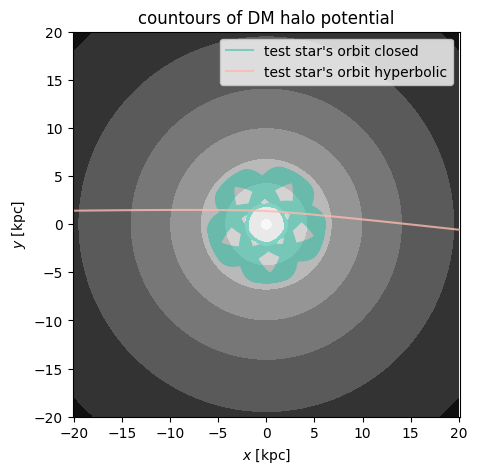

In [7]:
grid = np.linspace(-20,20,128)
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig = total_potential['dm_halo'].plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = a_orbit_DM.plot(['x','y'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax], 
                      auto_aspect=True, 
                      label="test star's orbit closed")
fig2 = b_orbit_DM.plot(['x','y'], color='#FCBBAE',  
                      alpha=0.8, axes=[ax], 
                      auto_aspect=True, 
                      label="test star's orbit hyperbolic")
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.legend()
ax.set_title('countours of DM halo potential')


4. Integrar orbitas anteriores e ir agregando componentes.  
    - DM halo (`total_potential['dm_halo']`)
    - DM halo + disco (`total_potential['dm_halo']` + `total_potential['disk']`)
    - DM halo + disco + bulge (`total_potential['dm_halo']` + `total_potential['disk']` + `total_potential['bulge']`)

In [8]:
a_orbit = gp.Hamiltonian(total_potential).integrate_orbit(a_particle, dt=0.5*u.Myr , 
                                                                    t1=0, t2=10*u.Gyr)
b_orbit = gp.Hamiltonian(total_potential).integrate_orbit(b_particle,dt =0.5*u.Myr , 
                                                                    t1=0, t2=10*u.Gyr)


Text(0.5, 1.0, 'countours of potential')

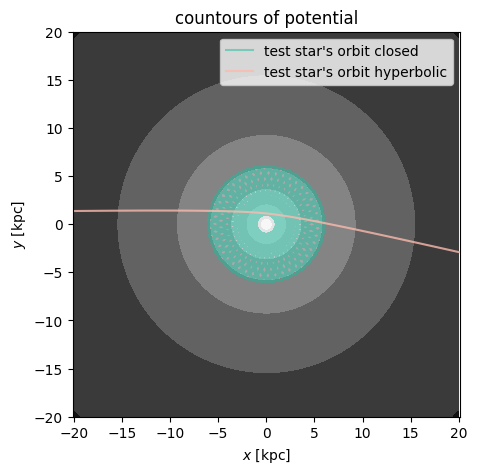

In [9]:
grid = np.linspace(-20,20,128)
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig = total_potential.plot_contours(grid=(grid, grid, 0), 
                                    cmap='Greys', ax=ax)
fig = a_orbit.plot(['x','y'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax], 
                      auto_aspect=True, 
                      label="test star's orbit closed")
fig2 = b_orbit.plot(['x','y'], color='#FCBBAE',  
                      alpha=0.8, axes=[ax], 
                      auto_aspect=True, 
                      label="test star's orbit hyperbolic")
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.legend()
ax.set_title('countours of potential')

Podemos notar que el espacio se hace denso mucho mas rapido que cuando solo trabajamos sobre el halo esferico de materia oscura. Por otro lado la orbita hiperbolica, sigue siendo hiperbolica.  
Tambien graficaremos la energia de la particula en el tiempo, y comprobaremos si efectivamente son cerrada e hiperbolica respectivamente.

In [10]:
b_totalenergy = b_orbit.energy().to(u.kpc**2/u.Myr**2)

a_totalenergy = a_orbit.energy().to(u.kpc**2/u.Myr**2)

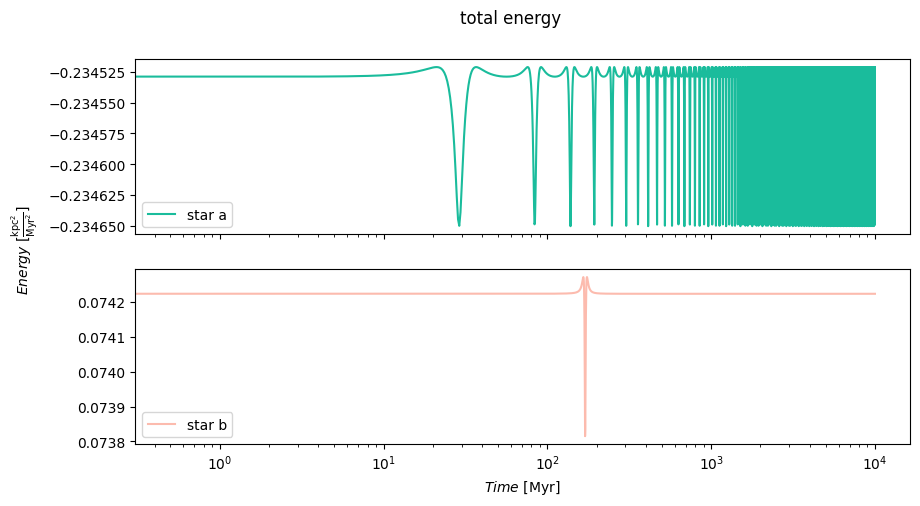

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)

ax[0].plot(a_orbit.t, a_totalenergy, 
           color='#1ABC9C', label='star a')
ax[1].plot(b_orbit.t, b_totalenergy, 
         color='#FCBBAE', label='star b')

ax[1].set_xlabel("$Time$ [{}]".format(a_orbit.t.unit.to_string(format="latex")))
ax[0].set_xscale('log')
ax[1].set_xscale('log')

fig.text(0.03, 0.5, "$Energy$ [{}]".format(a_totalenergy.unit.to_string(format='latex')),
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical')
plt.suptitle('total energy')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

Como podemos notar, la energia total es negativa en el caso de la estrella a, es decir, esta cerrada, mientras que para la estrella b (cabe destacar que su posicion es mucho mas lejana a la galaxia que la posicion inicial de a), la energia total se mantiene siempre positiva.  
Podemos observar tambien que la evolucion de la energia en el tiempo nos indica que tan lejos o cerca se encuentra el cuerpo del area de mayor potencial de la galaxia. Si consideramos que la energia total es la suma de la energia cintica y potencial, notamos que estas se mantienen en equilibrio para la orbita cerrada, subiendo y bajando de manera complementaria, mientras que para la orbita hiperbolica, la energia potencial baja cuando se acerca a la galaxia, pero no es suficiente para que la energia total sea negativa, es decir la energia cinetica no disminuye y por ende la energia total es mayor a 0. 

In [12]:
a_eccentricity = a_orbit.eccentricity()
b_eccentricity = b_orbit.eccentricity()

a_apocenter = a_orbit.apocenter()
b_apocenter = b_orbit.apocenter()

a_pericenter = a_orbit.pericenter()
b_pericenter = b_orbit.pericenter()

/opt/anaconda3/envs/astro/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/astro/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Gala utiliza la ecuacion:
$\begin{equation}
e = \frac{r_{\rm apo} - r_{\rm per}}{r_{\rm apo} + r_{\rm per}}
\end{equation}$
Y con ello podemos obtener los valores correspondientes a la eccentiricidad. Mientras que el apocentro y pericentro promedio provienen de la integracion numerica de la orbita


In [13]:

print(a_eccentricity, a_apocenter, a_pericenter)
print(b_eccentricity,b_apocenter, b_pericenter )

0.7095922426112573 6.01542239391078 kpc 1.021837420421007 kpc
nan nan kpc 1.1152944507957727 kpc


| star   | eccentricidad      | apocentro | pericentro |
|--------|--------------------|-----------|------------|
| a star | 0.7095922426112573 | 6.015 kpc |  1.022 kpc |
| b star |                nan |       nan |   1.12 kpc |

6. Comparar y discutir: 
 
Podemos notar que la eccentricidad de la orbita de a es menor a 1, que por definicion significa que es una orbita eliptica. Luego tenemos que su apocentro medio es ~6 kpc y su pericentro ~1kpc. Considerando que la estrella b parte por fuera de la galaxia y no queda ligada, notamos que no hay un valor para la ecentricidad y el apocentro, que deben ser $e_{b}\gt\gt1$ y apocentro $\rightarrow \infty $, pero que su pericentro es similar al de a (~1kpc). Esto podria deberse a que ambos se acercan a la galaxia en el mismo plano (es decir con posicion inicia en z iguales)

--------
### Practica II
Objetivo: Seguimiento a la practica anterior para explorar mas propiedades aprendidas en clases.

1. Considerar orbitas cerradas solamente. De forma secuencial graficar:   
    - Energia vs tiempo
    - momento angular total vs tiempo
    - componentes de momento angular vs tiempo
    - eccentricidad vs tiempo

In [14]:
def calculate_eccentricity(apocenter, pericenter):
    eccentricity = (apocenter - pericenter) / (apocenter + pericenter)
    return eccentricity

In [15]:
# Respecto a la practica anterior utilizaremos la estrella a 
# que es cerrada, y calcularemos su momento angular

#para el dm halo
aDM_totalenergy = a_orbit_DM.energy()

aDM_angularmoment = a_orbit_DM.angular_momentum
aDM_Lx = aDM_angularmoment()[0]
aDM_Ly = aDM_angularmoment()[1]
aDM_Lz = aDM_angularmoment()[2] 
aDM_totalangularmoment = np.sqrt(aDM_Lx**2 + 
                               aDM_Ly**2 + 
                               aDM_Lz**2)
aDM_pericenter = (a_orbit_DM.pericenter(return_times=True, func=None)[0]).to_value()
aDM_apocenter = (a_orbit_DM.apocenter(return_times=True, func=None)[0]).to_value()
aDM_apocenter = np.delete(aDM_apocenter, -1)
timeDMecc = a_orbit_DM.pericenter(return_times=True, func=None)[1]
aDM_ecc = calculate_eccentricity(aDM_apocenter, aDM_pericenter)

#para el disco
a_orbit_disk = gp.Hamiltonian(total_potential['disk']).integrate_orbit(a_particle, 
                                                                  dt=0.5*u.Myr , 
                                                                    t1=0, t2=10*u.Gyr)
a_disk_totalenergy = a_orbit_disk.energy()

a_disk_angularmoment = a_orbit_disk.angular_momentum
a_disk_Lx = a_disk_angularmoment()[0]
a_disk_Ly = a_disk_angularmoment()[1]
a_disk_Lz = a_disk_angularmoment()[2] 
a_disk_totalangularmoment = np.sqrt(a_disk_Lx**2 + 
                               a_disk_Ly**2 + 
                               a_disk_Lz**2)
a_disk_pericenter = (a_orbit_disk.pericenter(return_times=True, func=None)[0]).to_value()
a_disk_apocenter = (a_orbit_disk.apocenter(return_times=True, func=None)[0]).to_value()
a_disk_apocenter = np.delete(a_disk_apocenter, -1)
timediskecc = a_orbit_disk.pericenter(return_times=True, func=None)[1]
a_disk_ecc = calculate_eccentricity(a_disk_apocenter, a_disk_pericenter)



#para el bulbo
a_orbit_bulge = gp.Hamiltonian(total_potential['bulge']).integrate_orbit(a_particle, 
                                                                  dt=0.5*u.Myr , 
                                                                    t1=0, t2=10*u.Gyr)
a_bulge_totalenergy = a_orbit_bulge.energy()

a_bulge_angularmoment = a_orbit_bulge.angular_momentum
a_bulge_Lx = a_bulge_angularmoment()[0]
a_bulge_Ly = a_bulge_angularmoment()[1]
a_bulge_Lz = a_bulge_angularmoment()[2] 
a_bulge_totalangularmoment = np.sqrt(a_bulge_Lx**2 + 
                               a_bulge_Ly**2 + 
                               a_bulge_Lz**2)

a_bulge_pericenter = (a_orbit_bulge.pericenter(return_times=True, func=None)[0]).to_value()
a_bulge_apocenter = (a_orbit_bulge.apocenter(return_times=True, func=None)[0]).to_value()
#a_bulge_apocenter = np.delete(a_bulge_apocenter, -1)
timebulgeecc = a_orbit_bulge.pericenter(return_times=True, func=None)[1]
a_bulge_ecc = calculate_eccentricity(a_bulge_apocenter, a_bulge_pericenter)


#para todos los potenciales
a_angularmoment = a_orbit.angular_momentum
a_Lx = a_angularmoment()[0]
a_Ly = a_angularmoment()[1]
a_Lz = a_angularmoment()[2] 
a_totalangularmoment = np.sqrt(a_Lx**2 + 
                               a_Ly**2 + 
                               a_Lz**2)

timeecc = a_orbit.pericenter(return_times=True, func=None)[1]
a_apocenter = (a_orbit.apocenter(return_times=True, func=None)[0]).to_value()
a_pericenter = (a_orbit.pericenter(return_times=True, func=None)[0]).to_value()
a_apocenter = np.delete(a_apocenter, -1)
a_ecc = calculate_eccentricity(a_apocenter, a_pericenter)



In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

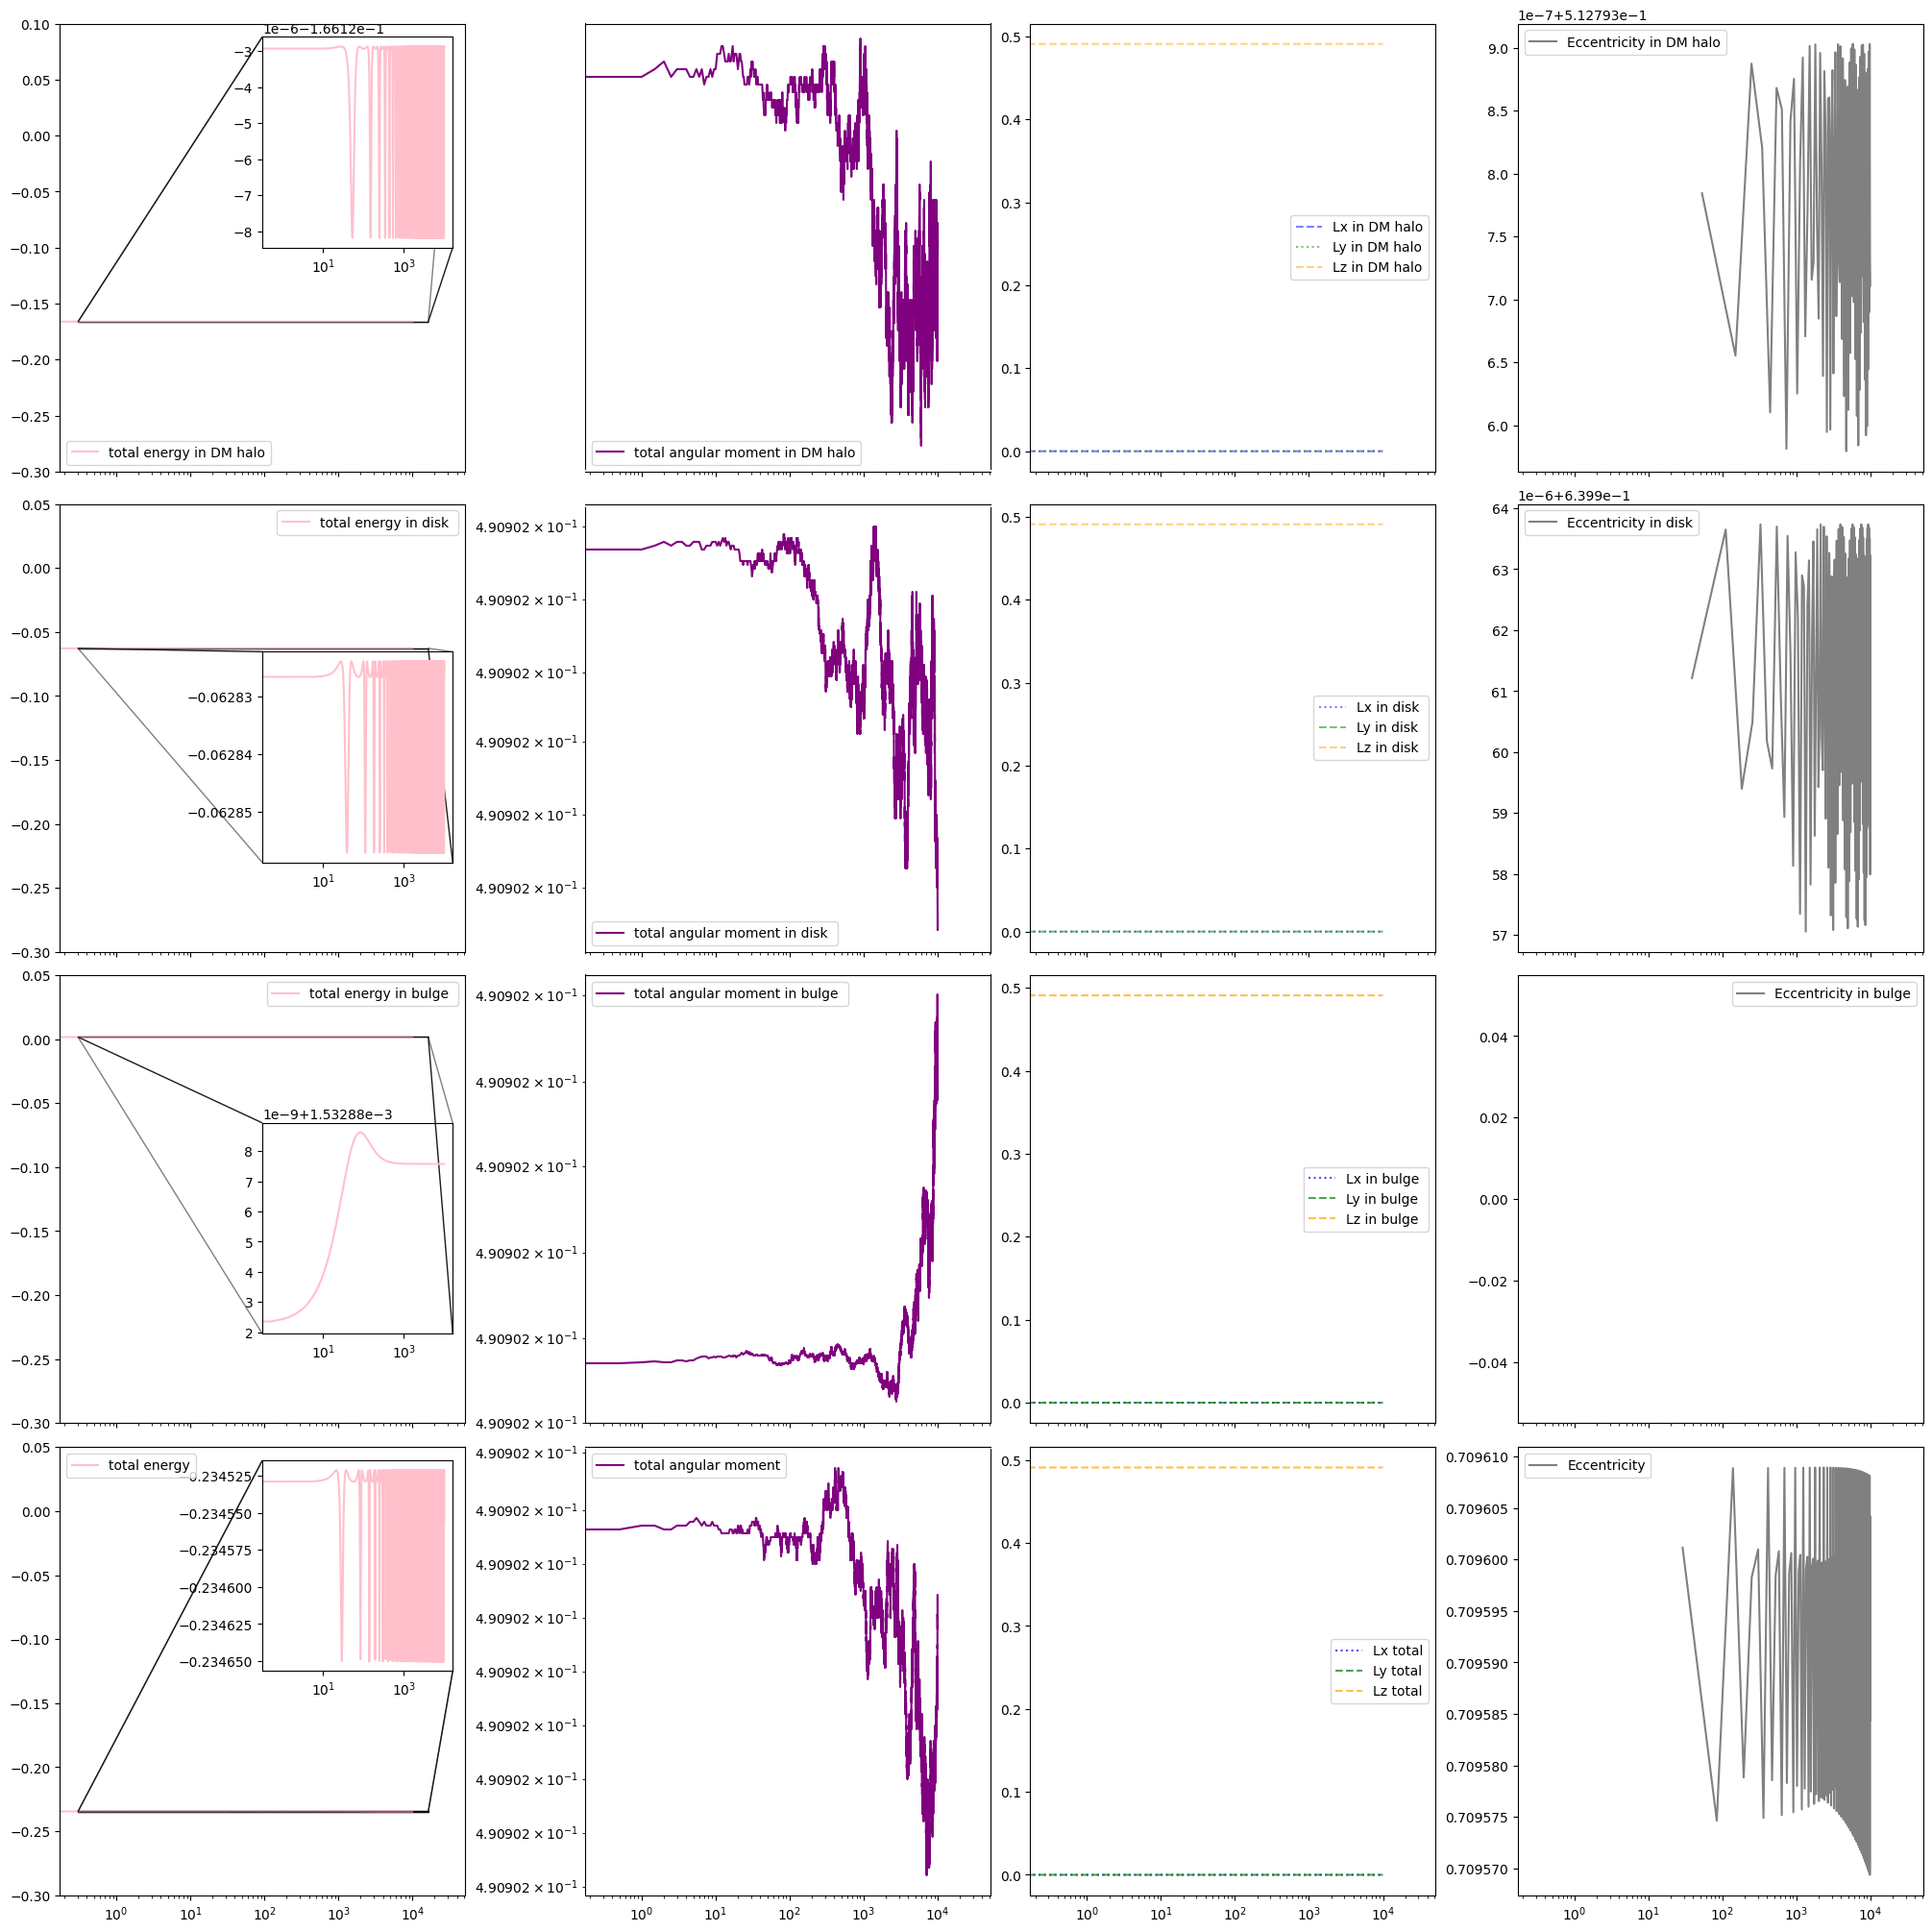

In [17]:
t = a_orbit.t


fig, ax = plt.subplots(4,4, figsize=(20,20), constrained_layout = True, sharex=True)
ax[0,0].set_xscale('log')
ax[0,0].plot(t, aDM_totalenergy, color='pink', label='total energy in DM halo')
ax[0,0].legend(loc='best')
ax[0,0].set_ylim(-0.3,0.1)

axins = ax[0,0].inset_axes([0.5, 0.5, 0.47, 0.47])
# axins = zoomed_inset_axes(ax[0,0], 3, loc=4) # zoom = 6
# sub region of the original image

axins.set_xscale('log')
axins.plot(t, aDM_totalenergy, color='pink', label='total energy in DM halo')

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax[0,0].indicate_inset_zoom(axins, edgecolor="black")
mark_inset(ax[0,0], axins, loc1=2, loc2=4, fc='none',ec='0.1')




ax[0,1].plot(t, aDM_totalangularmoment, color='purple', label='total angular moment in DM halo')
ax[0,1].legend(loc='best')
ax[0,1].set_yscale('log')


ax[0,2].plot(t, aDM_Lx, color='blue', alpha=0.5,label='Lx in DM halo', linestyle='--')
ax[0,2].plot(t, aDM_Ly, color='green', alpha=0.5, label='Ly in DM halo', linestyle=':')
ax[0,2].plot(t, aDM_Lz, color='orange', alpha=0.5, label='Lz in DM halo', linestyle='--')
ax[0,2].legend(loc='best')

ax[0,3].plot(timeDMecc, aDM_ecc, color='gray', label='Eccentricity in DM halo')
ax[0,3].legend(loc='best')


ax[1,0].set_xscale('log')
ax[1,0].plot(t, a_disk_totalenergy, color='pink', label='total energy in disk ')
ax[1,0].legend(loc='best')
ax[1,0].set_ylim(-0.3,0.05)

axins1 = ax[1,0].inset_axes([0.5, 0.2, 0.47, 0.47])
# axins = zoomed_inset_axes(ax[0,0], 3, loc=4) # zoom = 6
# sub region of the original image

axins1.set_xscale('log')
axins1.plot(t, a_disk_totalenergy, color='pink')

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax[1,0].indicate_inset_zoom(axins1, edgecolor="black")
mark_inset(ax[1,0], axins1, loc1=2, loc2=4, fc='none',ec='0.1')

ax[1,1].plot(t, a_disk_totalangularmoment, color='purple', label='total angular moment in disk ')
ax[1,1].legend(loc='best')
ax[1,1].set_yscale('log')


ax[1,2].plot(t, a_disk_Lx, color='blue', alpha=0.5,label='Lx in disk ',linestyle=':')
ax[1,2].plot(t, a_disk_Ly, color='green', alpha=0.5, label='Ly in disk ',linestyle='--')
ax[1,2].plot(t, a_disk_Lz, color='orange', alpha=0.5, label='Lz in disk ',linestyle='--')
ax[1,2].legend(loc='best')

ax[1,3].plot(timediskecc, a_disk_ecc, color='gray', label='Eccentricity in disk')
ax[1,3].legend(loc='best')



ax[2,0].set_xscale('log')
ax[2,0].plot(t, a_bulge_totalenergy, color='pink', label='total energy in bulge ')
ax[2,0].legend(loc='best')
ax[2,0].set_ylim(-0.3,0.05)

axins2 = ax[2,0].inset_axes([0.5, 0.2, 0.47, 0.47])
axins2.set_xscale('log')
axins2.plot(t, a_bulge_totalenergy, color='pink')

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax[2,0].indicate_inset_zoom(axins2, edgecolor="black")
mark_inset(ax[2,0], axins2, loc1=2, loc2=4, fc='none',ec='0.1')

ax[2,1].plot(t, a_bulge_totalangularmoment, color='purple', label='total angular moment in bulge ')
ax[2,1].legend(loc='best')
ax[2,1].set_yscale('log')

ax[2,2].plot(t, a_bulge_Lx, color='blue', alpha=0.7,label='Lx in bulge ',linestyle=':')
ax[2,2].plot(t, a_bulge_Ly, color='green', alpha=0.7, label='Ly in bulge', linestyle='--')
ax[2,2].plot(t, a_bulge_Lz, color='orange', alpha=0.7, label='Lz in bulge ',linestyle='--')
ax[2,2].legend(loc='best')

ax[2,3].plot(timebulgeecc, a_bulge_ecc, color='gray', label='Eccentricity in bulge')
ax[2,3].legend(loc='best')



ax[3,0].set_xscale('log')
ax[3,0].plot(t, a_totalenergy, color='pink', label='total energy')
ax[3,0].legend(loc='best')
ax[3,0].set_ylim(-0.3,0.05)
axins3 = ax[3,0].inset_axes([0.5, 0.5, 0.47, 0.47])
axins3.set_xscale('log')
axins3.plot(t, a_totalenergy, color='pink')
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax[3,0].indicate_inset_zoom(axins3, edgecolor="black")
mark_inset(ax[3,0], axins3, loc1=2, loc2=4, fc='none',ec='0.1')

ax[3,1].plot(t, a_totalangularmoment, color='purple', label='total angular moment')
ax[3,1].legend(loc='best')
ax[3,1].set_yscale('log')

ax[3,2].plot(t, a_Lx, color='blue', alpha=0.7,label='Lx total', linestyle=':')
ax[3,2].plot(t, a_Ly, color='green', alpha=0.7, label='Ly total', linestyle='--')
ax[3,2].plot(t, a_Lz, color='orange', alpha=0.7, label='Lz total', linestyle='--')
ax[3,2].legend(loc='best')

ax[3,3].plot(timeecc, a_ecc, color='gray', label='Eccentricity')
ax[3,3].legend(loc='best')


Notemos que el bulbo no muetra eccentricidad para la estrella a. Esto es porque en la deifnicon delpotencial del bulbo, su masa es demasiado baja para atraer gravitatoriamente a la estrella a y dejarla ligada. Se puede corroborar observando que la orbita que toma la estrella cuando solo entra al bulbo tiene $E \gt 0$. Y dentro de la segunda columna, podemos ver que enrealidad el ruido que se nota sobre la curva de momento angular es infimo, por ende este es constante en general, teniendo claras variaciones para el caso del bulbo, que no representa necesariamente error debido al metodo numerico de aproximacion (leap-frog, default integrator [https://gala.adrian.pw/en/latest/tutorials/pyia-gala-orbit.html]) y tiene relacion con lo mencionado previamente. 

In [18]:
position_x_a = a_orbit.x.value
velocity_x_a = a_orbit.vel.d_x.value
position_y_a = a_orbit.y.value
velocity_y_a = a_orbit.vel.d_y.value
position_z_a = a_orbit.z.value
velocity_z_a = a_orbit.vel.d_z.value
delta = 0.2

poincare_index_a = np.where((position_y_a >= -delta) & (position_y_a <= delta) & (velocity_y_a > 0))[0]
#poincare_index_c = np.where((position_y_c == 0) & (velocity_y_c > 0))[0]

poincare_position_x_a = position_x_a[poincare_index_a]
poincare_velocity_x_a = velocity_x_a[poincare_index_a]
poincare_velocity_y_a = velocity_y_a[poincare_index_a]
poincare_position_y_a = position_y_a[poincare_index_a]
poincare_position_z_a = position_z_a[poincare_index_a]
poincare_velocity_z_a = velocity_z_a[poincare_index_a]

In [19]:
position_x_b = b_orbit.x.value
velocity_x_b = b_orbit.vel.d_x.value
position_y_b = b_orbit.y.value
velocity_y_b = b_orbit.vel.d_y.value
position_z_b = b_orbit.z.value
velocity_z_b = b_orbit.vel.d_z.value
delta = 0.2

poincare_index_b = np.where((position_y_b >= -delta) & (position_y_b <= delta) & (velocity_y_b > 0))[0]
#poincare_index_b = np.where((position_y_b == 0) & (velocity_y_b > 0))[0]

poincare_position_x_b = position_x_b[poincare_index_b]
poincare_velocity_x_b = velocity_x_b[poincare_index_b]
poincare_velocity_y_b = velocity_y_b[poincare_index_b]
poincare_position_y_b = position_y_b[poincare_index_b]
poincare_position_z_b = position_z_b[poincare_index_b]
poincare_velocity_z_b = velocity_z_b[poincare_index_b]

<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_99327/3267452816.py:18: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


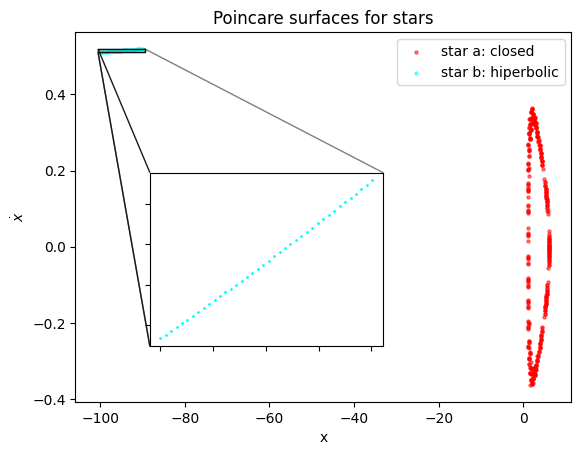

In [20]:
fig, ax  = plt.subplots()

ax.scatter(poincare_position_x_a, poincare_velocity_x_a,color='red', alpha=0.5, label='star a: closed', s=5)
ax.scatter(poincare_position_x_b, poincare_velocity_x_b, color='cyan', alpha=0.5, label='star b: hiperbolic', s=5)

axins = ax.inset_axes([0.15, 0.15, 0.47, 0.47])
axins.set_yticklabels([])
axins.set_xticklabels([])
axins.scatter(poincare_position_x_b, poincare_velocity_x_b, color='cyan', s=1)


ax.indicate_inset_zoom(axins, edgecolor="black")
mark_inset(ax, axins, loc1=2, loc2=3, fc='none',ec='0.1')

plt.title('Poincare surfaces for stars')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.show()


In [21]:
# Disk component
position_x_disk = a_orbit_disk.x.value
velocity_x_disk = a_orbit_disk.vel.d_x.value
position_y_disk = a_orbit_disk.y.value
velocity_y_disk = a_orbit_disk.vel.d_y.value
position_z_disk = a_orbit_disk.z.value
velocity_z_disk = a_orbit_disk.vel.d_z.value

# Bulge component
position_x_bulge = a_orbit_bulge.x.value
velocity_x_bulge = a_orbit_bulge.vel.d_x.value
position_y_bulge = a_orbit_bulge.y.value
velocity_y_bulge = a_orbit_bulge.vel.d_y.value
position_z_bulge = a_orbit_bulge.z.value
velocity_z_bulge = a_orbit_bulge.vel.d_z.value

# DM component
position_x_dm = a_orbit_DM.x.value
velocity_x_dm = a_orbit_DM.vel.d_x.value
position_y_dm = a_orbit_DM.y.value
velocity_y_dm = a_orbit_DM.vel.d_y.value
position_z_dm = a_orbit_DM.z.value
velocity_z_dm = a_orbit_DM.vel.d_z.value

delta = 0.2

# Selecting particles
poincare_index_disk = np.where((position_y_disk >= -delta) & (position_y_disk <= delta) & (velocity_y_disk > 0))[0]
poincare_index_bulge = np.where((position_y_bulge >= -delta) & (position_y_bulge <= delta) & (velocity_y_bulge > 0))[0]
poincare_index_dm = np.where((position_y_dm >= -delta) & (position_y_dm <= delta) & (velocity_y_dm > 0))[0]

# Selecting poincare section data for each component
poincare_position_x_disk = position_x_disk[poincare_index_disk]
poincare_velocity_x_disk = velocity_x_disk[poincare_index_disk]
poincare_velocity_y_disk = velocity_y_disk[poincare_index_disk]
poincare_position_y_disk = position_y_disk[poincare_index_disk]
poincare_position_z_disk = position_z_disk[poincare_index_disk]
poincare_velocity_z_disk = velocity_z_disk[poincare_index_disk]

poincare_position_x_bulge = position_x_bulge[poincare_index_bulge]
poincare_velocity_x_bulge = velocity_x_bulge[poincare_index_bulge]
poincare_velocity_y_bulge = velocity_y_bulge[poincare_index_bulge]
poincare_position_y_bulge = position_y_bulge[poincare_index_bulge]
poincare_position_z_bulge = position_z_bulge[poincare_index_bulge]
poincare_velocity_z_bulge = velocity_z_bulge[poincare_index_bulge]

poincare_position_x_dm = position_x_dm[poincare_index_dm]
poincare_velocity_x_dm = velocity_x_dm[poincare_index_dm]
poincare_velocity_y_dm = velocity_y_dm[poincare_index_dm]
poincare_position_y_dm = position_y_dm[poincare_index_dm]
poincare_position_z_dm = position_z_dm[poincare_index_dm]
poincare_velocity_z_dm = velocity_z_dm[poincare_index_dm]


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_99327/3715340710.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


Text(0, 0.5, '$\\dot{x}$')

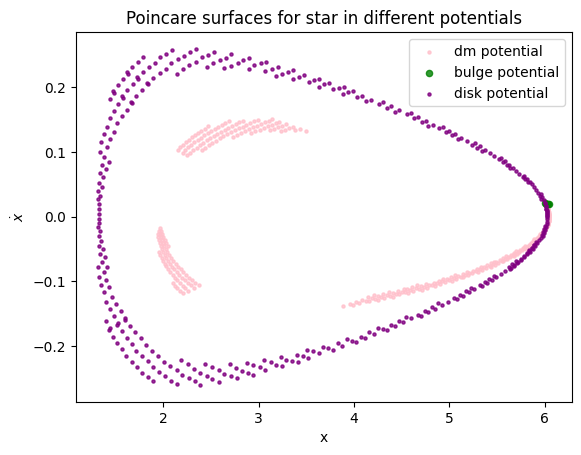

In [22]:
fig, ax  = plt.subplots()

ax.scatter(poincare_position_x_dm, poincare_velocity_x_dm,color='pink', alpha=0.8, label='dm potential', s=5)
ax.scatter(poincare_position_x_bulge, poincare_velocity_x_bulge, color='green', alpha=0.8, label='bulge potential', s=20)
ax.scatter(poincare_position_x_disk, poincare_velocity_x_disk, color='purple', alpha=0.8, label='disk potential', s=5)


plt.title('Poincare surfaces for star in different potentials')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\dot{x}$')

3. Utilizar orbita circular en un potencial que contenga solo DM halo y disco.   
$x_i = (x,0,0)$  
$v_i = (0,v_{circ},0)$

In [23]:
import gala.dynamics as gd

In [24]:
xi = (10,0,0)
vi =  (0,150,0)
ics = gd.PhaseSpacePosition(pos = xi*u.kpc, 
                            vel = vi*u.km/u.s)
orbiti = gp.Hamiltonian(total_potential['dm_halo']+total_potential['disk']).integrate_orbit(ics, dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

position_x_i = orbiti.x.value
velocity_x_i = orbiti.vel.d_x.value
position_y_i = orbiti.y.value
velocity_y_i = orbiti.vel.d_y.value
position_z_i = orbiti.z.value
velocity_z_i = orbiti.vel.d_z.value
delta = 0.2

poincare_index_i = np.where((position_y_i >= -delta) & (position_y_i <= delta) & (velocity_y_i > 0))[0]
#poincare_index_c = np.where((position_y_c == 0) & (velocity_y_c > 0))[0]

poincare_position_x_i = position_x_i[poincare_index_i]
poincare_velocity_x_i = velocity_x_i[poincare_index_i]
poincare_velocity_y_i = velocity_y_i[poincare_index_i]
poincare_position_y_i = position_y_i[poincare_index_i]
poincare_position_z_i = position_z_i[poincare_index_i]
poincare_velocity_z_i = velocity_z_i[poincare_index_i]

4. Perturbar levemente la orbita con un $\Delta v_x \lt\lt v_y$

In [25]:
xii = (10,0,0)
vii =  (-2,150,0)
ics = gd.PhaseSpacePosition(pos = xii*u.kpc, 
                            vel = vii*u.km/u.s)
orbitii = gp.Hamiltonian(total_potential['dm_halo']+total_potential['disk']).integrate_orbit(ics, dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

position_x_ii = orbitii.x.value
velocity_x_ii = orbitii.vel.d_x.value
position_y_ii = orbitii.y.value
velocity_y_ii = orbitii.vel.d_y.value
position_z_ii = orbitii.z.value
velocity_z_ii = orbitii.vel.d_z.value
delta = 0.2

poincare_iindex_ii = np.where((position_y_ii >= -delta) & (position_y_ii <= delta) & (velocity_y_ii > 0))[0]
#poincare_iindex_c = np.where((position_y_c == 0) & (velocity_y_c > 0))[0]

poincare_position_x_ii = position_x_ii[poincare_iindex_ii]
poincare_velocity_x_ii = velocity_x_ii[poincare_iindex_ii]
poincare_velocity_y_ii = velocity_y_ii[poincare_iindex_ii]
poincare_position_y_ii = position_y_ii[poincare_iindex_ii]
poincare_position_z_ii = position_z_ii[poincare_iindex_ii]
poincare_velocity_z_ii = velocity_z_ii[poincare_iindex_ii]

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_99327/4103845929.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


Text(0, 0.5, '$\\dot{x}$')

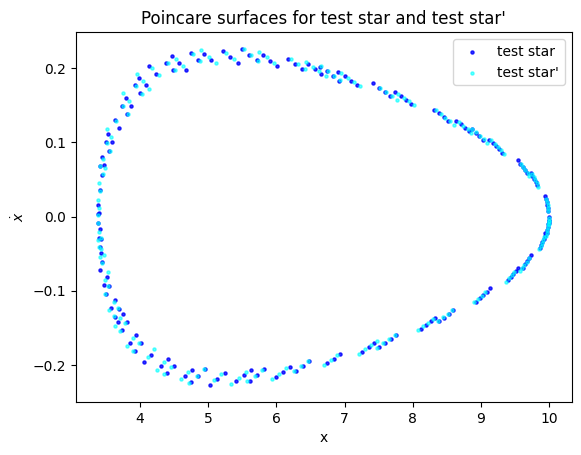

In [26]:
fig, ax  = plt.subplots()

ax.scatter(poincare_position_x_i, poincare_velocity_x_i,color='blue', alpha=0.8, label='test star', s=5)
ax.scatter(poincare_position_x_ii, poincare_velocity_x_ii,color='cyan', alpha=0.6, label='test star\'', s=5)


plt.title('Poincare surfaces for test star and test star\'')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\dot{x}$')

- Discutir  los resultados  
Se nota que la superficie de poincare que representa la estrella levemente pertubada se mueve respecto a la posicion inicial, esto significa que el tipo de orbita es igual (cerrada) pero, las pertubaciones deforman un poco las superficies de poincare.

--------


### Practica III
Objetivo: Comprender la densidad localde un enjambre de orbitas y su potencial  
1. Utilizando un par de orbitas sobre un potencial esferico de NFW tipo MW, calcular y graficar su evolucion temporal en ~10 Gyrs

Seguiremos utilizando el potencial que tenemos definido que es tipo MW para el DM halo, y las estrellas a (orbita cerrada) y b (orbita hiperbolica)

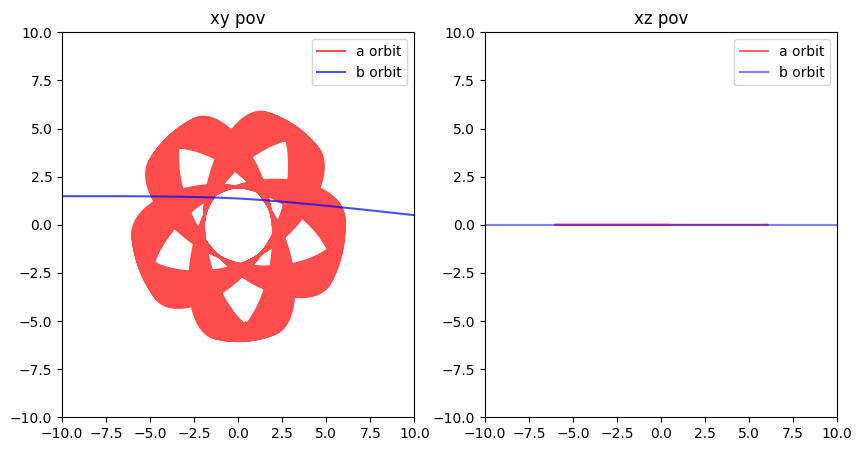

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(a_orbit_DM.pos.x ,a_orbit_DM.pos.y, 
           color='red', alpha=0.7, label='a orbit')
ax[0].plot(b_orbit_DM.pos.x, b_orbit_DM.pos.y, 
           color='blue', alpha=0.7, label='b orbit')
ax[0].set_xlim(-10,10)
ax[0].set_ylim(-10,10)


ax[1].plot(a_orbit_DM.pos.x, a_orbit_DM.pos.z, 
           color='red', alpha=0.6, label='a orbit')
ax[1].plot(b_orbit_DM.pos.x, b_orbit_DM.pos.z, 
           color='blue', alpha=0.5, label='b orbit')
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-10, 10)

ax[0].set_title('xy pov')
ax[1].set_title('xz pov')

ax[0].legend()
ax[1].legend()

2. Definir un volumen alrededor con las siguientes caracteristicas:
  - Gaussiane en 3D para posiciones y velocidades
  - Condiciones iniciales como la media de posicion y velocidad
  - $\sigma_r$ y $\sigma_{\dot{r}}$ con orden de $10^{-5}$ kpc y 1 km/s, respectivamente. 
  - Tener en total 1000 condiciones iniciales un poco distintas
  - Integrar todo y observar el enjambre en ~10 Gyrs

In [41]:
n_orbits = 1000

ics_a = gd.PhaseSpacePosition(pos = a_star_p*u.kpc, 
                            vel = a_star_v*u.km/u.s)
ics_b = gd.PhaseSpacePosition(pos = b_star_p*u.kpc, 
                            vel = b_star_v*u.km/u.s)


new_pos_a = np.random.normal(ics_a.pos.xyz.to(u.pc).value, 0.01,
                           size=(n_orbits,3)).T*u.pc
new_vel_a = np.random.normal(ics_a.vel.d_xyz.to(u.km/u.s).value, 1,
                           size=(n_orbits,3)).T * u.km/u.s

new_ics_a = gd.PhaseSpacePosition(pos=new_pos_a, vel=new_vel_a)
orbit_a = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(ics_a,  dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

orbits_total_a = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(new_ics_a, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)


new_pos_b = np.random.normal(ics_b.pos.xyz.to(u.pc).value, 0.01, 
                             size=(n_orbits,3)).T*u.pc
new_vel_b = np.random.normal(ics_b.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(n_orbits,3)).T * u.km/u.s

new_ics_b = gd.PhaseSpacePosition(pos=new_pos_b, vel=new_vel_b)
orbit_b = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(ics_b,  dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

orbits_total_b = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(new_ics_b, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)
    

Text(0.5, 1.0, 'DM potential and initial conditions')

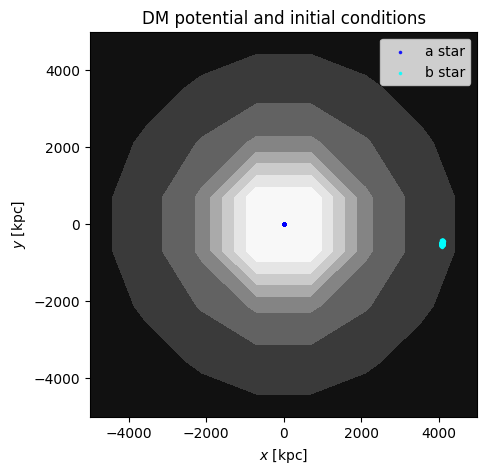

In [42]:
grid = np.linspace(-5000,5000,8)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['dm_halo'].plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits_total_a[-1].plot(['x','y'], color='blue', s=10,  
                      alpha=0.8, axes=[ax], auto_aspect=False,
                      label='a star')
fig = orbits_total_b[-1].plot(['x','y'], color='cyan', s=10,
                              alpha=0.8, axes=[ax], auto_aspect=False,
                              label='b star')
ax.set_xlim(-5000,5000)
ax.set_ylim(-5000,5000)
ax.legend()
ax.set_title('DM potential and initial conditions')

(-15.0, 15.0)

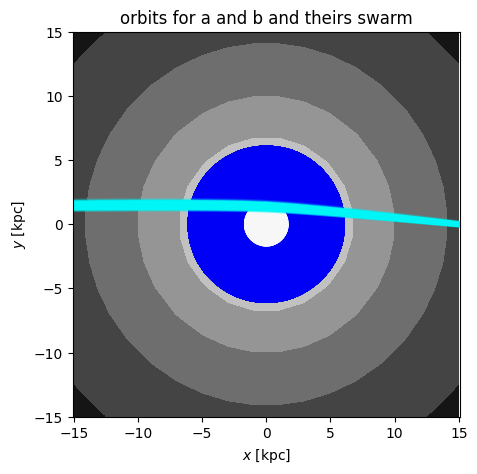

In [44]:
grid = np.linspace(-15,15,16)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['dm_halo'].plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits_total_a.plot(['x','y'], color='blue', axes=[ax], alpha=0.1, label='a star')
fig = orbits_total_b.plot(['x','y'], color='cyan', axes=[ax], alpha=0.1, label='b star')
ax.set_title('orbits for a and b and theirs swarm')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)


3. Graficar y observar evolucion de $\sigma_r$ y $\sigma_{\dot{r}}$.  
- sigma total
- sigma por componente ([x,y,z], [$\dot{x}, \dot{y}, \dot{z} $])

Nuestros parametros iniciales son:  
- a_star_p = [6,0,0]  
- a_star_v = [20,80,0]  
- b_star_p = [-100,0,0]
- b_star_v = [500,10,0]  
Las cuales estan en kiloparsec. Los $\sigma$ seran graficados en parsec. Por ende los errores son muy pequenitos. 

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_99327/521037230.py:27: SyntaxWarning: invalid escape sequence '\s'
  fig.suptitle('$\sigma_{r}$ for x, y, z \n blue for closed orbit and green for hiperbolic')


Text(0.5, 0.98, '$\\sigma_{r}$ for x, y, z \n blue for closed orbit and green for hiperbolic')

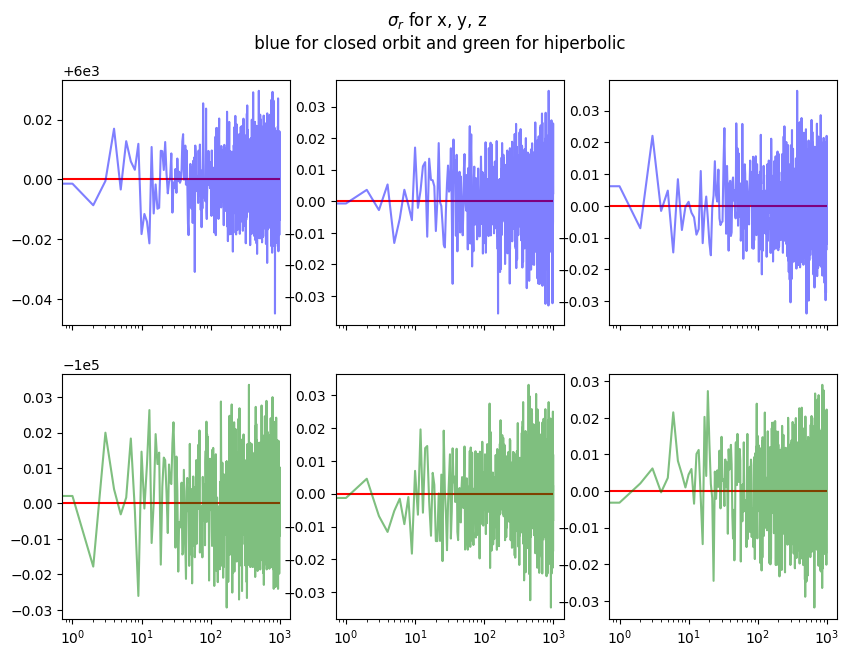

In [45]:
fig, ax = plt.subplots(2,3, sharex=True, figsize=(10,7))
xdata= np.arange(0,1000)

#x
ax[0,0].hlines(y=6000, xmin=0, xmax=1000, color='red')
ax[0,0].plot(xdata, new_pos_a[0], color='blue', alpha=0.5)

ax[0,0].set_xscale('log')
ax[1,0].hlines(y=-100000, xmin=0, xmax=1000, color='red')
ax[1,0].plot(xdata, new_pos_b[0], color='green', alpha=0.5)

#y
ax[0,1].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[0,1].plot(xdata, new_pos_a[1], color='blue', alpha=0.5)

ax[1,1].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[1,1].plot(xdata, new_pos_b[1], color='green', alpha=0.5)


#z
ax[0,2].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[0,2].plot(xdata, new_pos_a[2], color='blue', alpha=0.5)

ax[1,2].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[1,2].plot(xdata, new_pos_b[2], color='green', alpha=0.5)

fig.suptitle('$\sigma_{r}$ for x, y, z \n blue for closed orbit and green for hiperbolic')





<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_99327/1396872445.py:25: SyntaxWarning: invalid escape sequence '\s'
  fig.suptitle('$\sigma_{\dot{r}}$ for x, y, z \n blue for closed orbit and green for hiperbolic')


Text(0.5, 0.98, '$\\sigma_{\\dot{r}}$ for x, y, z \n blue for closed orbit and green for hiperbolic')

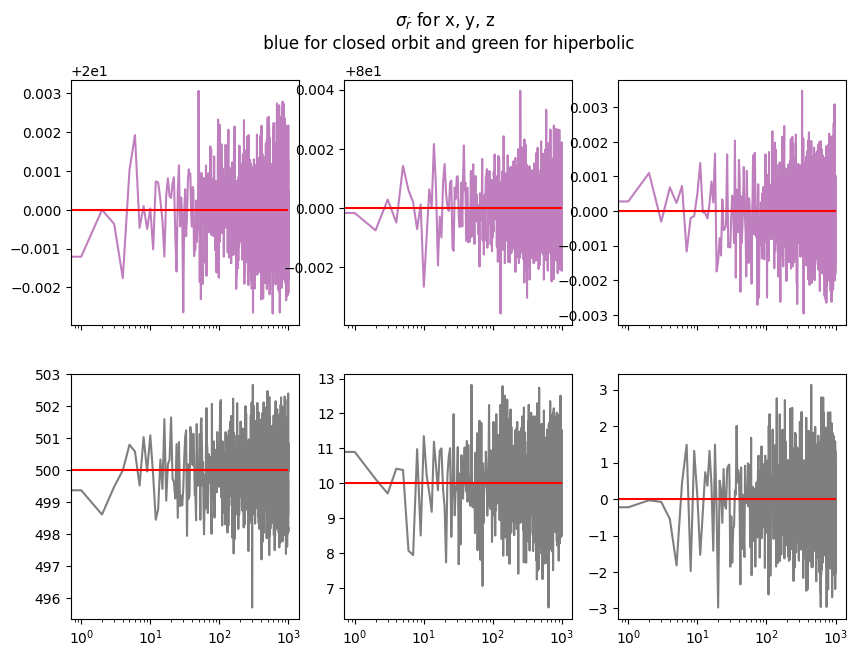

In [36]:
fig, ax = plt.subplots(2,3, sharex=True, figsize=(10,7))
xdata= np.arange(0,1000)

ax[0,0].set_xscale('log')

ax[0,0].plot(xdata, new_vel_a[0], color='purple', alpha=0.5)
ax[0,0].hlines(y=20, xmin=0, xmax=1000, color='red')

ax[1,0].plot(xdata, new_vel_b[0], color='black', alpha=0.5)
ax[1,0].hlines(y=500,xmin=0, xmax=1000, color='red')

ax[0,1].plot(xdata, new_vel_a[1], color='purple', alpha=0.5)
ax[0,1].hlines(y=80, xmin=0, xmax=1000, color='red')

ax[1,1].plot(xdata, new_vel_b[1], color='black', alpha=0.5)
ax[1,1].hlines(y=10, xmin=0, xmax=1000, color='red')

ax[0,2].plot(xdata, new_vel_a[2], color='purple', alpha=0.5)
ax[0,2].hlines(y=0, xmin=0, xmax=1000, color='red')

#0
ax[1,2].plot(xdata, new_vel_b[2], color='black', alpha=0.5)
ax[1,2].hlines(y=0, xmin=0, xmax=1000, color='red')

fig.suptitle('$\sigma_{\dot{r}}$ for x, y, z \n purple for closed orbit and gray for hiperbolic')



Si observamos y superponemos los graficos de posicion y velocidad para la misma componente donde ambos parten en cero, se puede notar lo visto en clases del paper de Gomez+2013, es decir, el comportamiento de x y $\dot{x}$ como sin y cos (ya que $\dot{x}$ es la derivada de x)

4. Tomar esferas de 1 y 2,5 kpc de radio, centradas a todo tiempo t, en la órbita central del enjambre.  
En cada paso de integración, calcular la densidad de partículas dentro de estas esferas.


In [53]:
fig, anim = orbits_total_a[:1000].cylindrical.animate(components=['rho', 'z'],  
                                             stride=10)
anim.save('closedswarmorbit.gif') 
plt.close() 

MovieWriter ffmpeg unavailable; using Pillow instead.


In [54]:
fig, anim = orbits_total_b[:1000].cylindrical.animate(components=['rho', 'z'],  
                                             stride=10)
anim.save('hiperbolicswarmorbit.gif') 
plt.close() 

MovieWriter ffmpeg unavailable; using Pillow instead.


Con las animaciones credas en la celda anterior, (closedswamorbit.gif y hiperbolicswarmorbit.gif), podemos observar que la densidad del enjambre aumenta a medida que se acerca mas a la parte mas masiva del potencial, y disminuye a medida que se aleja.

In [88]:
densitypoints_x

<Quantity [1.25738469e-04, 1.20612706e-01, 2.23195935e-01, 3.07768923e-01,
           3.74355704e-01, 4.22983790e-01, 4.53686799e-01, 4.66509214e-01,
           4.61515566e-01, 4.38809666e-01, 3.98579469e-01, 3.41218224e-01,
           2.67728324e-01, 1.81590158e-01, 1.03024971e-01, 1.29696560e-01,
           2.56421647e-01, 4.16525943e-01, 5.98386147e-01, 7.99638404e-01,
           9.58641432e-01, 7.52214653e-01, 5.68835292e-01, 4.13285814e-01,
           2.96789100e-01, 2.40739019e-01, 2.54839081e-01, 3.09098228e-01,
           3.71769828e-01, 4.28227866e-01, 4.72674196e-01, 5.02665075e-01,
           5.17124282e-01, 5.15644698e-01, 4.98263343e-01, 4.65479250e-01,
           4.18532145e-01, 3.60235756e-01, 2.97362492e-01, 2.47038594e-01,
           2.43762251e-01, 3.12066911e-01, 4.36644852e-01, 5.97430424e-01,
           7.84739969e-01, 9.94452133e-01, 8.46048004e-01, 6.87084999e-01,
           5.57019204e-01, 4.60924688e-01, 4.03362023e-01, 3.83479959e-01,
           3.91817496e-01

In [89]:
density25 = []
for i in range(len(orbits_total_a.t)):
    x_swarm = orbits_total_a.x[:]
    y_swarm = orbits_total_a.y[:]
    z_swarm = orbits_total_a.z[:]
    x_center = orbit_a.x[i]
    y_center = orbit_a.y[i]
    z_center = orbit_a.z[i]
    distance_x = np.linalg.norm(x_swarm-x_center, axis=1)/(2.5*u.kpc)
    distance_y = np.linalg.norm(y_swarm-y_center, axis=1,)/(2.5*u.kpc)
    distance_z = np.linalg.norm(z_swarm-z_center, axis=1)/(2.5*u.kpc)
    x_25 = np.where(distance_x<=1)[0]
    y_25 = np.where(distance_y<=1)[0]
    z_25 = np.where(distance_z<=1)[0]
    densitypoints_x = distance_x[x_25]
    densitypoints_y = distance_y[y_25]
    densitypoints_z = distance_z[z_25]
    vol25 = (4/3) * np.pi * (2.5**3)
    densitytotal = (len(densitypoints_x) + len(densitypoints_y) + len(densitypoints_z)) / vol25
    density25.append(densitytotal)
    print(f't={i}')

density10 = []
for i in range(len(orbits_total_a.t)):
    x_swarm = orbits_total_a.x[:]
    y_swarm = orbits_total_a.y[:]
    z_swarm = orbits_total_a.z[:]
    x_center = orbit_a.x[i]
    y_center = orbit_a.y[i]
    z_center = orbit_a.z[i]
    distance_x = np.linalg.norm(x_swarm-x_center, axis=1)/(1.0*u.kpc)
    distance_y = np.linalg.norm(y_swarm-y_center, axis=1,)/(1.0*u.kpc)
    distance_z = np.linalg.norm(z_swarm-z_center, axis=1)/(1.0*u.kpc)
    x_10 = np.where(distance_x<=1)[0]
    y_10 = np.where(distance_y<=1)[0]
    z_10 = np.where(distance_z<=1)[0]
    densitypoints_x = distance_x[x_10]
    densitypoints_y = distance_y[y_10]
    densitypoints_z = distance_z[z_10]
    vol10 = (4/3) * np.pi * (1.0**3)
    densitytotal = (len(densitypoints_x) + len(densitypoints_y) + len(densitypoints_z)) / vol10
    density10.append(densitytotal)
    print(f't={i}')


t=0
t=1
t=2
t=3
t=4
t=5
t=6
t=7
t=8
t=9
t=10
t=11
t=12
t=13
t=14
t=15
t=16
t=17
t=18
t=19
t=20
t=21
t=22
t=23
t=24
t=25
t=26
t=27
t=28
t=29
t=30
t=31
t=32
t=33
t=34
t=35
t=36
t=37
t=38
t=39
t=40
t=41
t=42
t=43
t=44
t=45
t=46
t=47
t=48
t=49
t=50
t=51
t=52
t=53
t=54
t=55
t=56
t=57
t=58
t=59
t=60
t=61
t=62
t=63
t=64
t=65
t=66
t=67
t=68
t=69
t=70
t=71
t=72
t=73
t=74
t=75
t=76
t=77
t=78
t=79
t=80
t=81
t=82
t=83
t=84
t=85
t=86
t=87
t=88
t=89
t=90
t=91
t=92
t=93
t=94
t=95
t=96
t=97
t=98
t=99
t=100
t=101
t=102
t=103
t=104
t=105
t=106
t=107
t=108
t=109
t=110
t=111
t=112
t=113
t=114
t=115
t=116
t=117
t=118
t=119
t=120
t=121
t=122
t=123
t=124
t=125
t=126
t=127
t=128
t=129
t=130
t=131
t=132
t=133
t=134
t=135
t=136
t=137
t=138
t=139
t=140
t=141
t=142
t=143
t=144
t=145
t=146
t=147
t=148
t=149
t=150
t=151
t=152
t=153
t=154
t=155
t=156
t=157
t=158
t=159
t=160
t=161
t=162
t=163
t=164
t=165
t=166
t=167
t=168
t=169
t=170
t=171
t=172
t=173
t=174
t=175
t=176
t=177
t=178
t=179
t=180
t=181
t=182
t=183
t=184


KeyboardInterrupt: 

In [ ]:
density25b = []
for i in range(len(orbits_total_b.t)):
    x_swarm = orbits_total_b.x[:]
    y_swarm = orbits_total_b.y[:]
    z_swarm = orbits_total_b.z[:]
    x_center = orbit_b.x[i]
    y_center = orbit_b.y[i]
    z_center = orbit_b.z[i]
    distance_x = np.linalg.norm(x_swarm-x_center, axis=1)/(2.5*u.kpc)
    distance_y = np.linalg.norm(y_swarm-y_center, axis=1,)/(2.5*u.kpc)
    distance_z = np.linalg.norm(z_swarm-z_center, axis=1)/(2.5*u.kpc)
    x_25 = np.where(distance_x<=1)[0]
    y_25 = np.where(distance_y<=1)[0]
    z_25 = np.where(distance_z<=1)[0]
    densitypoints_x = distance_x[x_25]
    densitypoints_y = distance_y[y_25]
    densitypoints_z = distance_z[z_25]
    vol25 = (4/3) * np.pi * (2.5**3)
    densitytotal = (len(densitypoints_x) + len(densitypoints_y) + len(densitypoints_z)) / vol25
    density25b.append(densitytotal)
    print(f't={i}')

density10b = []
for i in range(len(orbits_total_b.t)):
    x_swarm = orbits_total_b.x[:]
    y_swarm = orbits_total_b.y[:]
    z_swarm = orbits_total_b.z[:]
    x_center = orbit_b.x[i]
    y_center = orbit_b.y[i]
    z_center = orbit_b.z[i]
    distance_x = np.linalg.norm(x_swarm-x_center, axis=1)/(1.0*u.kpc)
    distance_y = np.linalg.norm(y_swarm-y_center, axis=1,)/(1.0*u.kpc)
    distance_z = np.linalg.norm(z_swarm-z_center, axis=1)/(1.0*u.kpc)
    x_10 = np.where(distance_x<=1)[0]
    y_10 = np.where(distance_y<=1)[0]
    z_10 = np.where(distance_z<=1)[0]
    densitypoints_x = distance_x[x_10]
    densitypoints_y = distance_y[y_10]
    densitypoints_z = distance_z[z_10]
    vol10 = (4/3) * np.pi * (1.0**3)
    densitytotal = (len(densitypoints_x) + len(densitypoints_y) + len(densitypoints_z)) / vol10
    density10b.append(densitytotal)
    print(f't={i}')

ValueError: x and y must be the same size

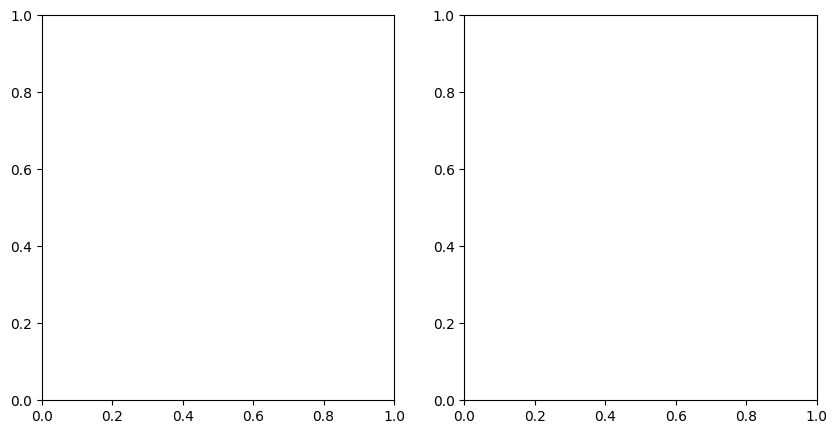

In [90]:
fig, ax = plt.subplots(1,4, figsize=(10,5))
ax[0].scatter(orbits_total_a.t, density25, s=4, 
              alpha=0.8, color='blue', label='closed orbit')
ax[1].scatter(orbits_total_b.t, density25b, s=4, 
              alpha=0.8, color='cyan', label='hyperbolic orbit' )

ax[2].scatter(orbits_total_a.t, density10,
              s=4, alpha=0.8, color='blue', label='closed orbit')
ax[3].scatter(orbits_total_b.t, density10b,
              s=4, alpha=0.8, color='cyan', label='hyperbolic orbit')

5. Repetir el experimento, ahora considerando:  
    - Un potencial NFW triaxial.  
    - Un potencial MW-like (compueso completo)
